# Принятие решений в бизнесе на основе данных

Коротко и тезисно. Есть крупный интернет-магазин. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки. Требуется выбрать наиболее приоритетные гипотезы, провести A/B тест, проанализировать его результаты и сделать вывод.

План:
1. Приоретизация гипотез
2. Анализ различных показателей по группам (как выручка, средний чек и т.д.)
3. Нахождение границы аномальных параметров пользователей
4. Отсеивание аномальных значений и статистическое исследование "сырых" и обработанных данных
5. Вывод

## Приоретизация гипотез

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore') #Игнорируем предупреждение при вызове plt.xticks(Rotation = -30)

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis #Изучаем полученный датафрейм
pd.options.display.max_colwidth = 1

In [4]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 3) #Применяем фреймворк ICE
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


Видим, что при приоритизации гипотез методом 'ICE' наиболее эффективными считаются 8, 0 и 7 гипотезы

In [5]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'] 
hypothesis.sort_values(by='RICE', ascending=False)                    #Аналогично с RICE

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0


При использовании фреймворка 'RICE' наиболее эффективными оказались 7, 2, 0 и 6 гипотезы (0 и 6 занимают почетное 3 место с одинаковым результатом)

По совокупности методов наиболее эффективными оказались 7 и 0 гипотеза, но есть один ньюанс. Дело в том, что метод 'RICE' имеет в своей формуле переменную *Reach* — скольких пользователей затронет изменение, которое вы хотите внести; поэтому целесообразнее придерживаться этого метода. Метод 'ICE' не учитывает его, поэтому на 1 месте оказалась 8 гипотеза с охватом = 1, что интересно, конечно, но бизнесу лучше ориентироваться на бОльшую часть аудитории, а не на ее меньшую часть. Тем более, что при сравнении 8 и 7 гипотезы выгоднее будет 7, так как затраты(Effrots = 5) одинаковы, а Reach отличается на целых 9 пунктов в пользу 7 гипотезы.

**Вывод:** Будем руководствоваться методом 'RICE' и примем за наиболее эффективные гипотезы 7, 2, 0 и 6. Из них наиболее эффективная 7 - ее и выберем

## Анализ A/B теста

### Получение данных

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


На всякий случай, посмотрели типы данных, соответствуют ли они нужным нам (сразу оговорюсь, что в orders столбец date правильного типа - date, просто он попадает в классификацию object) и есть ли пропуски в данных. На всякий случай проверим на явные дубликаты, но вряд ли эта часть предполагалась изначально)

In [9]:
display(visitors.duplicated().sum())
orders.duplicated().sum()

0

0

In [10]:
orders.duplicated(subset='visitorId').sum() #Есть 166 повторяющихся пользователей

166

In [11]:
#Смотрим, попали ли наши пользователи в разные группы. 
#Попали, но здесь так же считаются случаи, когда пользователь 2 раза попал  в 1 группу
pd.concat(g for _, g in orders.groupby("visitorId") if len(g) > 1) 

,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A
26,2223239646,199603092,2019-08-15,3488,A
134,62794304,199603092,2019-08-22,6976,A
246,437656952,199603092,2019-08-02,3488,B
...,...,...,...,...,...
1018,1415970216,4256040402,2019-08-31,5170,A
1019,453824282,4256040402,2019-08-31,1850,B
1091,750632879,4256040402,2019-08-12,50,A
662,1811671147,4266935830,2019-08-29,78990,A


In [12]:
check = orders.loc[orders["group"]=="A", "visitorId"].isin(orders.loc[orders["group"]=="B", "visitorId"])
clear_orders = orders.drop(check[check].index)
clear_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1108 non-null   int64 
 1   visitorId      1108 non-null   int64 
 2   date           1108 non-null   object
 3   revenue        1108 non-null   int64 
 4   group          1108 non-null   object
dtypes: int64(3), object(2)
memory usage: 51.9+ KB


Сделали проверку на попадание пользователей в 2 группы сразу. Прошлая учитывала случаи, когда человек совершал несколько покупок, теперь проверка была по пользователям, находятся ли они сразу в 2 группах. Выяснилось, что таких пользователей 58 человек (5%). Было решено их оставить

На всякий случай переименовал новый датафрейм в orders и проверил значения. Все точно так же, как и писал ранее, только график количества заказов не показывает 1 у всех, а прецентили стали 95% = 1.5 заказа, 99% - 3 заказа. В остальном все +- так же, поэтому оставим, как есть, но забьем память еще 2 переменными)

In [13]:
(orders.groupby('visitorId')['group'].nunique() == 2).sum() #Считаем количество пользователей, находящихся в 2 группах

58

####  Кумулятивная выручка по группам

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),
    axis=1).sort_values(by=['date','group']
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

         date group  transactions  buyers  revenue  visitors
0  2019-08-01  A     24            20      148579   719     
1  2019-08-01  B     21            20      101217   713     
2  2019-08-02  A     44            38      242401   1338    
3  2019-08-02  B     45            43      266748   1294    
4  2019-08-03  A     68            62      354874   1845    


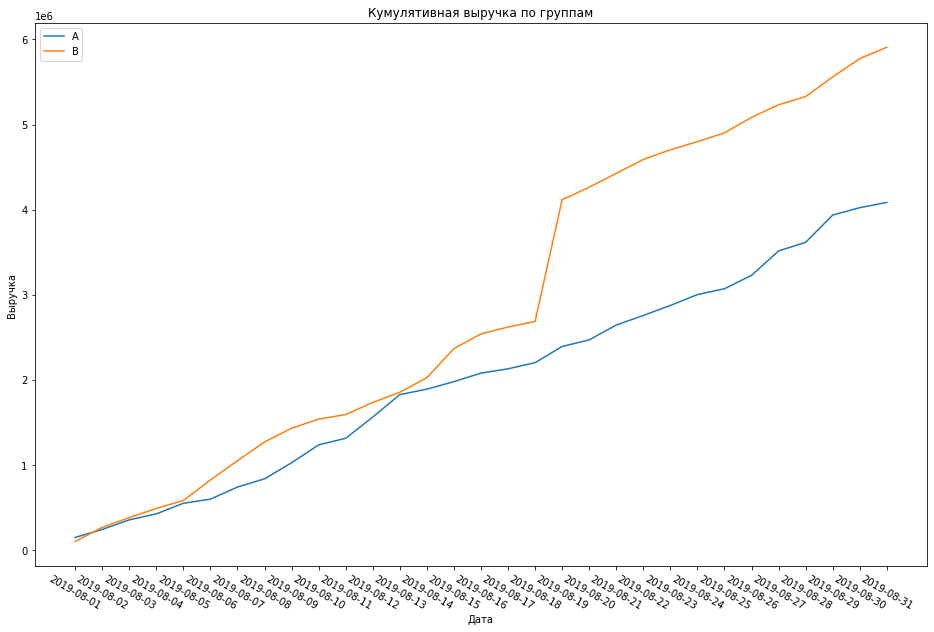

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactions', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactions', 'visitors']]

plt.rcParams["figure.figsize"] = (16,10) # Установим размер графиков по умолчанию

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A') # Строим график выручки группы А

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B') # Строим график выручки группы B

plt.title("Кумулятивная выручка по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка")

plt.xticks(Rotation = -30) #Повернем подписи оси x под 30 градусов, чтобы они не сливались
plt.legend();

Заметно, что накопленная выручка группы B уверенно лидирует с отрывом практически с самого начала A/B теста, но стоит понимать, что пока что мы анализируем сырые данные(без анализа аномалий и прочего), поэтому не стоит полностью полагаться на этот вывод.

Помимо этого, заметно резкое увеличение выручки группы B с 19 по 20 августа 2019

####  Кумулятивный средний чек по группам

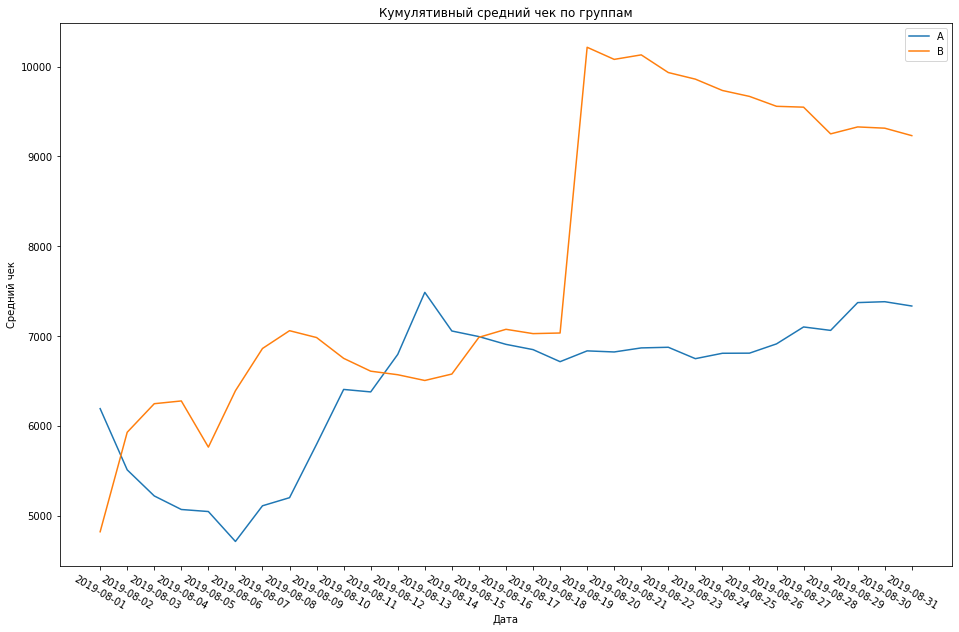

In [16]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], label='B')

plt.title("Кумулятивный средний чек по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")

plt.xticks(Rotation = -30)
plt.legend();

Видим, что изначально(первый день) группа B сильно отставала, но после этого обогнала по среднему чеку группу A. В какой-то период группа A начала расти, дошла до своего максимума по средним чекам и перегнала группу B.

Здесь было бы интересно поизучать, почему в начале графика мы видим практически симметричное падение вниз и последующий рост(для группы A падение 2019-08-06, для B - 2019-08-07), почему группа A достигла своего максимума по средним чекам в середине A/B теста(2019-08-11 - 2019-08-15 - резкий рост и последующее падение) и держалась дальше относительно стабильно (в это же время у группы B упал средний чек) и почему у группы B наблюдается такой аномальный рост среднего чека(2019-08-19 - 2019-08-20), который потом снижается. Судя по резкому росту, произошла какая-то маркетинговая акция или что-то подобное, что, по идее, не должно происходить в А/В тесте

Но опять же, здесь мы смотрим данные по необработанным данным, поэтому пока что просто запоминаем, что заметили

#### Относительное изменение кумулятивного среднего чека группы B к A

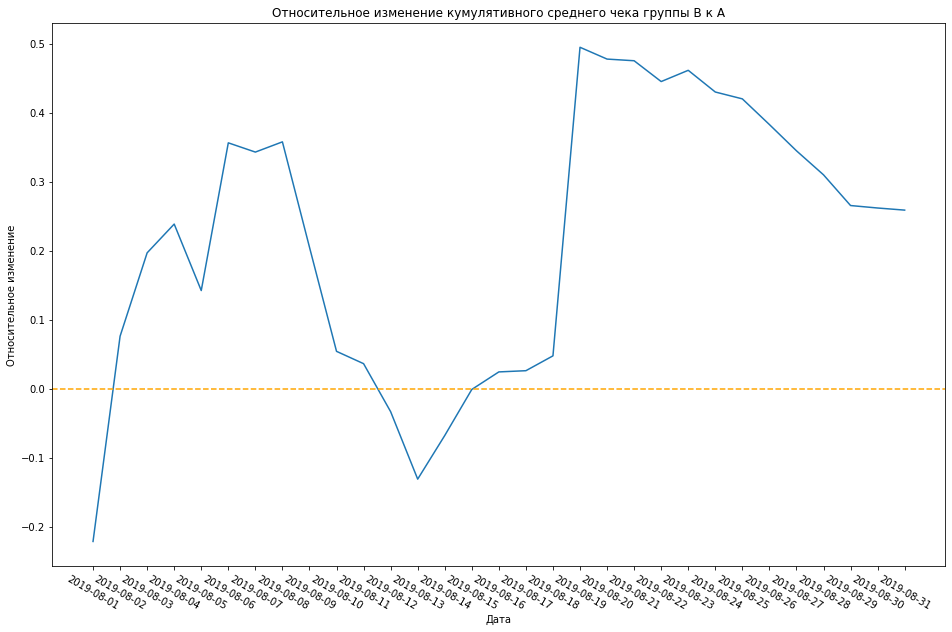

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB']) /
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1
        )

plt.title("Относительное изменение кумулятивного среднего чека группы B к A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение")

plt.xticks(Rotation = -30)

plt.axhline(y=0, color='orange', linestyle='--'); # добавляем ось X

Здесь мы видим, что первый день кумулятивный средний чек группы B был ниже группы A, но потом догнал и перегнал ее. Опять же, замечаем, что в кумулятивный чек группы B резко падает (2019-08-05 -- 2019-08-6; 2019-08-12 -- 2019-08-16), но потом вновь растет, причем, так же резко, как и падал(2019-08-20 - 2019-08-21)

#### Кумулятивное среднее количества заказов по группам

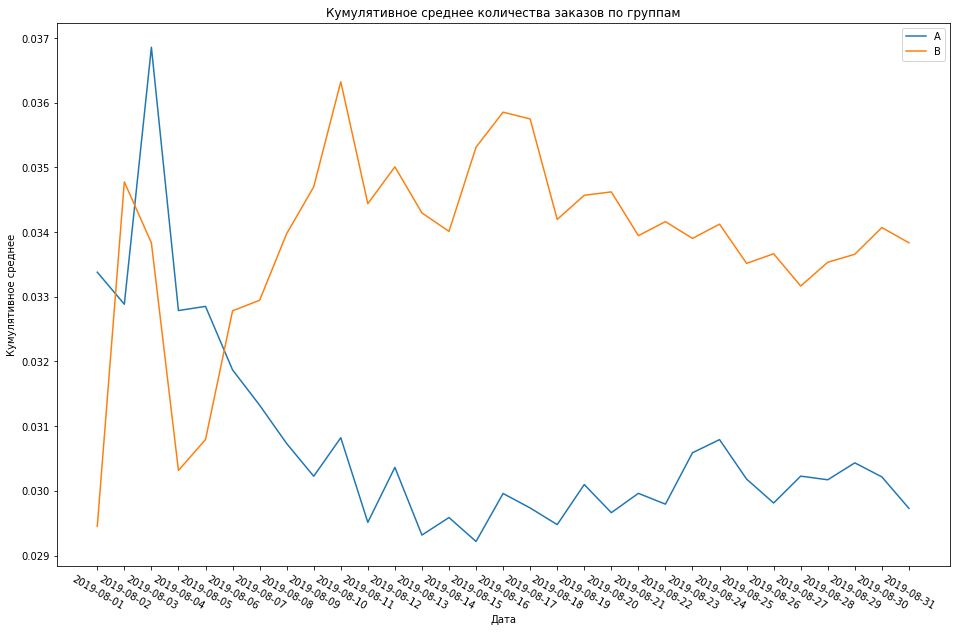

In [18]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['transactions'] / cumulativeRevenueA['visitors'] , label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['transactions'] / cumulativeRevenueB['visitors'], label='B')

plt.title("Кумулятивное среднее количества заказов по группам")
plt.xlabel("Дата")
plt.ylabel("Кумулятивное среднее")
plt.xticks(Rotation = -30)
plt.legend();

Количество заказов в группе B больше. В начале заметен резкий рост у обеих групп, но далее группа A постепенно снижает количество заказов, тогда как группа B держится на высоком уровне

#### Относительное изменение кумулятивного среднего количества заказов группы B к A

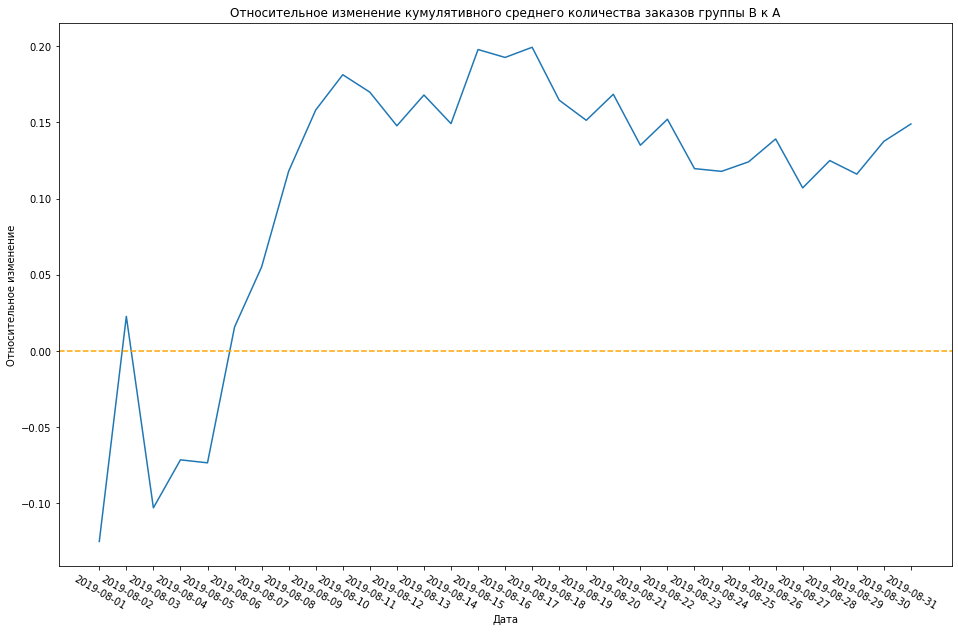

In [19]:
plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['transactionsB']/mergedCumulativeRevenue['transactionsA']-1)

plt.title("Относительное изменение кумулятивного среднего количества заказов группы B к A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение")
plt.xticks(Rotation = -30)
plt.axhline(y=0, color='orange', linestyle='--');

Видим, что со старта A/B теста и до 2019-08-07 кумулятивное среднее количества заказов группы B находится ниже группы A(за исключением 2019-08-03),  а потом плавно растет и, дойдя до максимума, гораздо более плавно снижается.

Здесь стоит отметить первые пару дней графика, в частности, непонятно, почему так резко росло кумулятивное среднее количество заказов, а потом так же резко падало, в остальном график выглядит естественно. Скорее всего, после обработки данных и удаления аномалий мы избавимся от этого

#### График количества заказов по пользователям

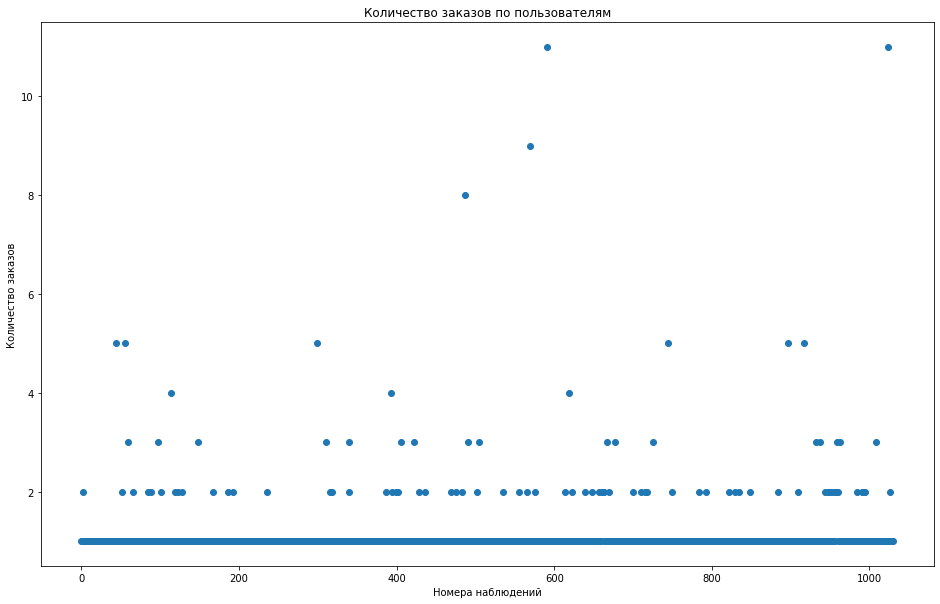

In [20]:
transactions = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
transactions.columns = ['visitors', 'transactions']
x_values = pd.Series(range(0,len(transactions))) #Сгенерированные номера наблюдений

plt.scatter(x_values, transactions['transactions'])
plt.title("Количество заказов по пользователям")
plt.xlabel("Номера наблюдений")
plt.ylabel("Количество заказов");

Предварительно делаем вывод, что к аномальным пользователям можно отнести людей, совершивших 4 и более покупки, но надо это дело подтвердить статически.

Но прежде, чем это сделать, построим аналогичный график для стоимости заказа, чтобы потом все расчеты(целых 2 строчки кода, между прочим(!), объединить в 1 пункт)

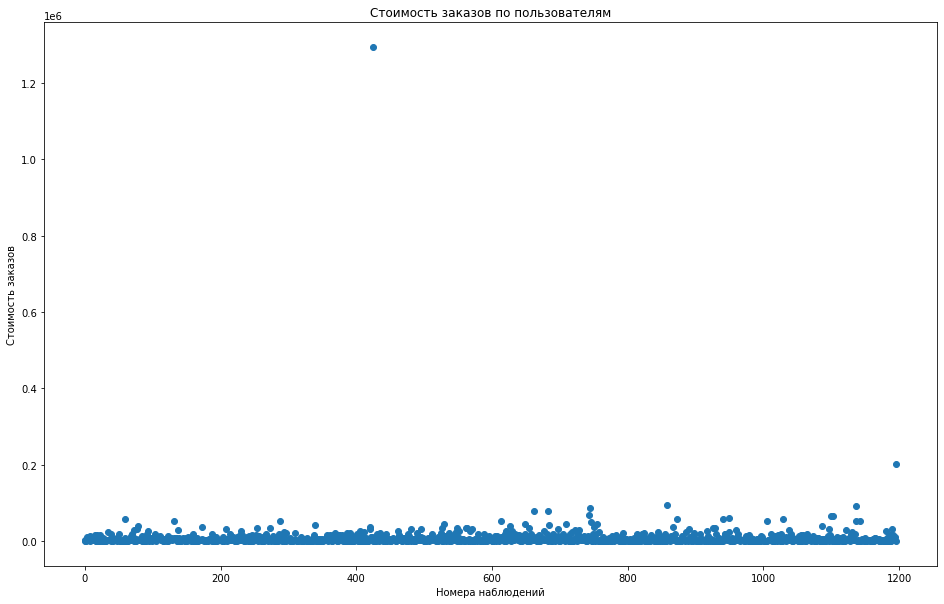

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title("Стоимость заказов по пользователям")
plt.xlabel("Номера наблюдений")
plt.ylabel("Стоимость заказов");

Видим 1 ярко выраженную аномалию стоимостью более 1.2млн у.е.. Общая масса заказов не превышает(визуально, расчеты - ниже) 50к у.е.

#### Подсчет перцентилей

In [22]:
print(np.percentile(transactions['transactions'], [95, 99])) 

[2. 4.]


Видим, что не более 5% пользователей оформляли больше 3 заказов, не более 1 процента - более 4

In [23]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% пользователей оформляли заказы дороже 28000 у.е., не более 1 процента - более 58233 у.е.

**Вывод:** считаем аномальными пользователей, совершивших более 3 покупок и оформивших заказы дороже 28000 у.е.

### Подсчет статистической значимости

#### Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

Здесь мы будем применять критерий Манна-Уитни для проверки наличия статистической значимых различий между "сырыми" и очищенными данными. Сначала мы выполним подготовительные действия(создадим датафреймы и укажем для пользователей их количество заказов) и проведем саму проверку

Статистическая значимость будет стандартной - 0.05, так как какой-либо повышенной точности не требуется

Гипотезы таковы: **Нулевая гипотеза** - статистически значимых различий между группами нет, **Альтернативная гипотеза** - статистически значимые различия между группами есть

Для того, чтобы сформировать датафрейм с критериями, описанными выше, требуется сделать следующие действия:

In [24]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]   #Посещение группой А в день
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(                                #Кумулятивное посещение группой А
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]     #Посещение группой B в день
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(                                  #Кумулятивное посещение группой B
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (                                                               # Количество заказов в день группой A
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'transactionsPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(                                       #Накопительное количество заказов группой А
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'transactionsPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'transactionsCummulativeA', 'revenueCummulativeA']

ordersBDaily = (                                                               # Количество заказов в день группой B
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'transactionsPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(                                       #Накопительное количество заказов группой В
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'transactionsPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'transactionsCummulativeB', 'revenueCummulativeB']

data = (                                                                       #Получившийся датафрейм
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

         date  transactionsPerDateA  revenuePerDateA  transactionsPerDateB  \
0  2019-08-01  24                    148579           21                     
1  2019-08-02  20                    93822            24                     
2  2019-08-03  24                    112473           16                     
3  2019-08-04  16                    70825            17                     
4  2019-08-05  25                    124218           23                     

   revenuePerDateB  transactionsCummulativeA  revenueCummulativeA  \
0  101217           24                        148579                
1  165531           44                        242401                
2  114248           68                        354874                
3  108571           84                        425699                
4  92428            109                       549917                

   transactionsCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                        101217           

Получили датафрейм, теперь для того, чтобы создать условия для отсечения аномальных пользователей, необходимо создать датафреймы для определения количества заказов у пользователей

In [25]:
ordersByUsersA = (                                       #Указываем количество заказов для пользователей группы А
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactions']

ordersByUsersB = (                                       #Указываем количество заказов для пользователей группы В
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactions']

Теперь объявляем переменные 'sampleA' и 'sampleB', в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это необходимо для подготовки выборок к проверке критерием Манна-Уитни.

In [26]:
sampleA = pd.concat(
    [
        ordersByUsersA['transactions'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions'])),
                  name='transactions')
    ],axis=0
)

sampleB = pd.concat(
    [
        ordersByUsersB['transactions'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactions'])),
                  name='transactions')
    ],axis=0
)

In [27]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])) #Применяем критерий Манна-Уитни

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


**Вывод:** По «сырым» данным различия в среднем количестве заказов групп A и B есть.

Первое число — p-value = 0.017 - меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Стоит заметить, что на графиках это было заметно.

Относительный выигрыш группы B равен 13,8% — второе число в выводе.

#### Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

Так как данные уже подготовлены, просто выберем нужные нам значения для проверки и получим необходимые данные для расчета

In [28]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


**Вывод:** По «сырым» данным различий в среднем количестве заказов групп A и B нет.

p-value = 0.729 (больше 0.05), значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами нет, не отвергаем. Относительный выигрыш группы B равен 25,9%.

### "Очистка" данных и их последующий анализ

Ранее мы определили границы для отсекания аномальных пользователей - более 2 заказов или сумма заказа более 28000. Сформируем датафрейм для таких пользователей и подсчитаем их количество:

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactions'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactions'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))  #Выведем 5 верхних строчек датафрейма для понимания, что все работает корректно
print(abnormalUsers.shape[0]) #Количество аномальных пользователей

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


Теперь посмотрим, как отфильтрованные данные повлияли на результаты исследования. Создаем новые переменные, где не будут учитываться аномальные пользователи, для последующего анализа

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

#### Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным

In [31]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.173


**Вывод:** По очищенным данным различия в среднем числе заказов групп A и B есть.

p-value = 0.013 (меньше 0.05), значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 17,3%.

Разница до и после очистки данных небольшая - p-value уменьшился на 0.004, относительный выигрыш вырос на 3,5%

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [32]:
print(                                                        #Аналогично предыдущей клетке кода, но здесь играем в лесенку
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


**Вывод:** По очищенным данным различий в среднем количестве заказов групп A и B нет.

p-value = 0.738 (был 0.729) (естественно, больше 0.05), значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами нет, не отвергаем. Здесь впервые появляется относительный проигрыш у группы B на 2% (упал на 27,9% после очистки данных)

## Общий вывод

Было выдвинуто 9 гипотез, после чего были использованы фреймворки 'ICE' и 'RICE' для их приоретизации. Так как метод 'RICE' позволяет анализировать большее количество параметров, мы руководствовались им и выбрали наиболее эффективную гипотезу под номером 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

Во время исследования было выявлено, что порядка 5% пользователей находились в обеих группах во время A/B теста. Так как количество таких пользователей небольшое, было решено оставить данные, как есть. Но, так как так не должно быть, следует проанализировать логику теста и выявить причины, по которым подобное произошло. 

По результатам исследования был сделан следующий вывод: **A/B тест стоит прекратить** и вот почему:

1. Практически с самого старта виден явный отрыв группы B от группы A по всем показателям
2. Есть статистически значимые различия по среднему количеству заказов между группами и по «сырым» данным, и по данным после фильтрации аномалий
3. Нет статистически значимого различия по среднему чеку между группами ни по «сырым» данным, ни по данным после фильтрации аномалий

Если мы посмотрим на графики (пункт 2.1.1 и 2.1.2), то увидим аномально высокий рост показателей у группы B с 2019-08-20 по 2019-08-21. В процессе исследования были отобраны и исключены аномальные пользователи по критерию количества заказов и их стоимости. Была проведена проверка на очищенных и "сырых" данных, после чего стало понятно, что статистически значимых различий между очищенными и "сырыми" данными нет.

Поэтому можно сделать **вывод**, что тест прошел **успешно** в пользу группы B, так как она показывает стабильную прибыль выше группы A и статистически значимое преимущество по количеству заказов.

*Опять же, если говорить о датах, то в начале A/B теста мы можем увидеть (2.1.2), как сначала у группы B, а потом и у A пропорционально падает в моменте кумулятивный средний чек, но, так как мы видим одинаковое влияние на обе группы, то делаем вывод, что A/B не нарушается при данной ситуации, но надо понять, из-за чего так среагировали обе группы.*